In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table

import omnitool
from omnitool.literature_values import *

import sys

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
import os
import sys
import random
import pickle

npts = 500
rQ = .60     #Mixture weighting
rmu = -1.7   #Inlier mean
rsigma = .05 #Inlier spread
rmuo = rmu   #Outlier mean [Not a parameter in the model]
rsigo = .35  #Outlier spread

#Create a series of fractional errors that are similar to those in our data
rf1 = np.random.randn(npts/2)*0.016 + 0.083   #First component is a Gaussian
rf2 = np.random.exponential(.04, npts/2)+.05  #Second component is an exponential
rf_unshuf = np.append(rf1, rf2)
rf = np.array(random.sample(rf_unshuf,npts)) #Shuffle the values before drawing from them

#Drawing the fractional uncertainties for the inlier and outlier sets
fi = rf[:int(npts*rQ)]
fo = rf[int(npts*rQ):int(npts*rQ) + int((1-rQ)*npts)]

iM_true = np.random.randn(int(npts*rQ)) * rsigma + rmu
iunc = np.abs(fi * iM_true)
iM_obs = iM_true + np.random.randn(int(npts*rQ))*iunc
oM_true = np.random.randn(int((1-rQ)*npts)) * rsigo + rmuo
ounc = np.abs(fo * oM_true)
oM_obs = oM_true + np.random.randn(int((1-rQ)*npts))*ounc

M_obs = np.append(oM_obs, iM_obs)  #Observed data
M_unc = np.append(ounc, iunc)      #Uncertainty on the above
M_true = np.append(oM_true, iM_true)  #The underlying ruth

sns.distplot(M_obs)
sns.distplot(M_unc)
sns.distplot(M_true)
plt.show()

#RUN THE DATA
dat = {'N': npts,
        'Mobs': M_obs,
        'Munc': M_unc}
init = {'mu' : rmu,
      'sigma': rsigma,
       'sigo': rsigo,
       'Q' : rQ}

model_path = 'asterostan.pkl'
if os.path.isfile(model_path):
    sm = pickle.load(open(model_path, 'rb'))

fit = sm.sampling(data = dat, iter= 10000, chains=4, init=[init,init,init,init])
fit.plot()
plt.show()

/usr/local/lib/python2.7/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [1]:
sys.exit()

NameError: name 'sys' is not defined

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def normal(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2/(2*sigma**2))

In [4]:
'''<Just testing some transformations>'''
x = np.linspace(-10, 10,1000)
n0 = normal(x, 0., 1.)
n1 = normal(x, 5., 2.)

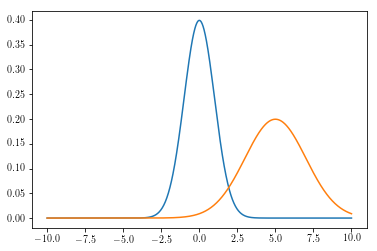

In [5]:
plt.plot(x,n0)
plt.plot(x,n1)
plt.show()

In [6]:
data = Table.read('../data/KepxDR2/kepler_dr2_1arcsec.fits', format='fits')
df = data.to_pandas()
df.rename(columns={'kepid':'KICID'},inplace=True)
df.head(2)
print(len(df))

195830


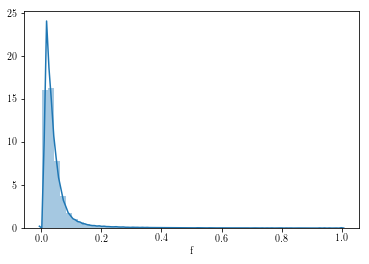

0.0008890332561434751
0.9993698244693284


In [25]:
df['f'] = df.parallax_error/np.abs(df.parallax)
s = (df.f > 0.) & (df.f < 1.)
sns.distplot(df.f[s])
plt.show()
print(np.min(df.f[s]))
print(np.max(df.f[s]))

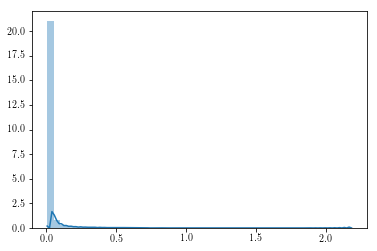

In [7]:
sns.distplot(df.parallax_error.values[np.isfinite(df.parallax)])
plt.show()

In [8]:
'''<<<ASTROMETRIC>>>'''
df['r_err'] = np.sqrt((df.r_hi-df.r_est)**2 + (df.r_est - df.r_lo)**2)

sg = omnitool.spyglass()
sg.pass_position(df.ra, df.dec, frame='icrs')
sg.pass_distance(df.r_est, df.r_err)

sg.pass_magnitude(df.kmag, band='Ks')
df['MKs'], df['MKs_err'] = sg.get_M()

In [9]:
#Now we need to check content for Nans
print('Before : '+str(len(df)))
df = df[np.isfinite(df.MKs)]
print('After : '+str(len(df)))
list(df)

Before : 195830
After : 195585


['designation',
 'source_id',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'duplicated_source',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'bp_g',
 'g_rp',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag',
 'l',
 'b',
 'ecl_lon',
 'ecl_lat',
 'teff_val',
 'teff_percentile_lower',
 'teff_percentile_upper',
 'a_g_val',
 'a_g_percentile_lower',
 'a_g_percentile_upper'

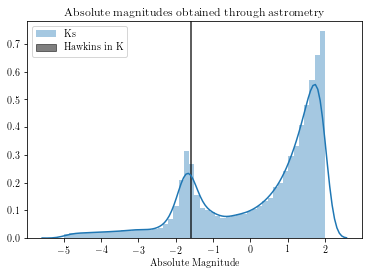

In [10]:
#Now lets study the distributions
sel = (df.MKs > -5.) & (df.MKs < 2.)
sns.distplot(df.MKs[sel], label='Ks')
plt.axvspan(hawkvals['Ks']-hawkerr,hawkvals['Ks']+hawkerr,alpha=.5,color='k',label='Hawkins in K')
plt.title('Absolute magnitudes obtained through astrometry')
plt.xlabel('Absolute Magnitude')
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


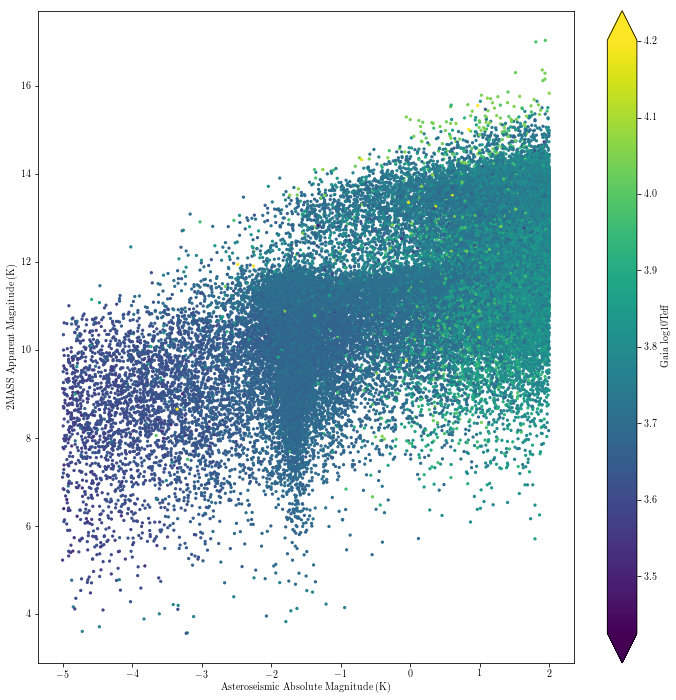

In [11]:
%pylab inline
fig, ax = plt.subplots(figsize=(12,12))
c = ax.scatter(df.MKs[sel],df.kmag[sel],c=np.log10(df.teff[sel]),s=5,zorder=1000)
# ax.errorbar(df.MKs[sel],df.kmag[sel],xerr=df.MKs_err[sel],alpha=.5,fmt='none',c='grey',zorder=999)
ax.set_xlabel('Asteroseismic Absolute Magnitude (K)')
ax.set_ylabel('2MASS Apparent Magnitude (K)')
fig.colorbar(c,extend='both',label='Gaia log10Teff')
# ax.set_ylim(3., 12.)
plt.show()

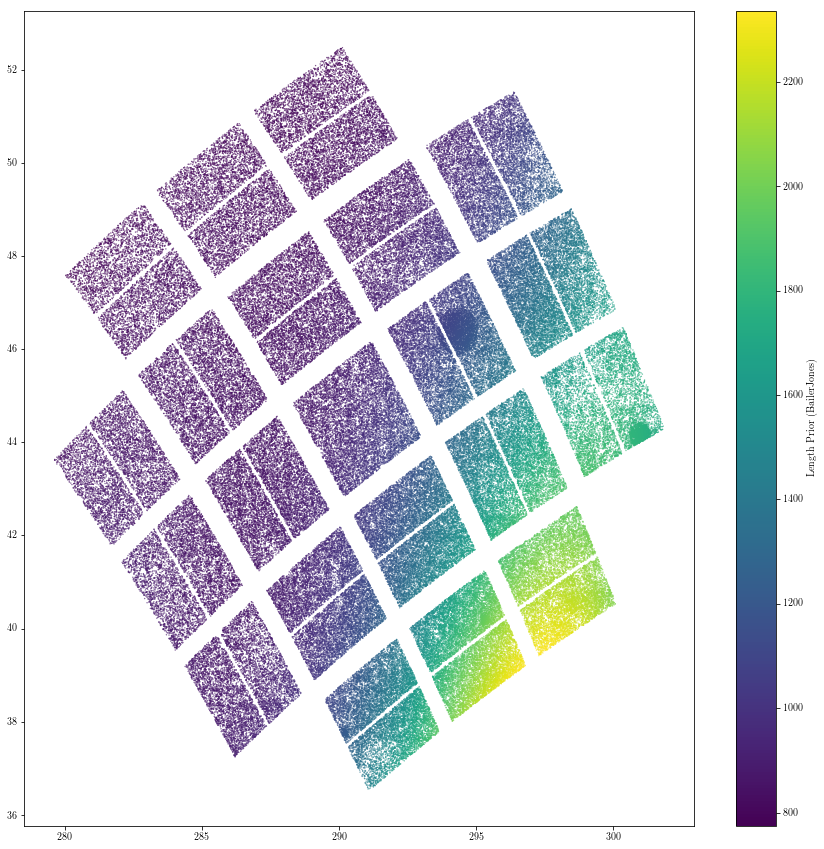

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
c = ax.scatter(df.ra, df.dec,s=0.1,c=df.r_length_prior)
fig.colorbar(c,label='Length Prior (BailerJones)')
plt.show()


In [13]:
def read_data():
#     sfile = '../Data/MRCxyu18.csv'
    sfile = '../data/KepxDR2/MRCxyu18_wdupes_BC.csv'
    df = pd.read_csv(sfile,index_col=0)
    return df
yu18 = read_data()

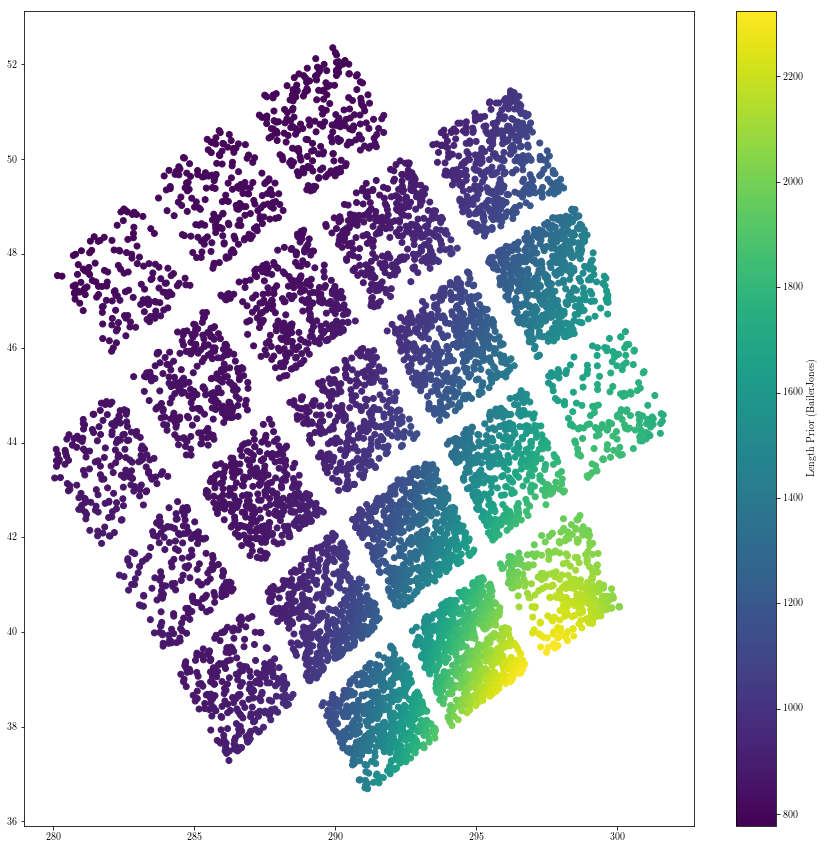

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
c = ax.scatter(yu18.ra, yu18.dec,c=yu18.r_length_prior)
fig.colorbar(c,label='Length Prior (BailerJones)')
plt.show()

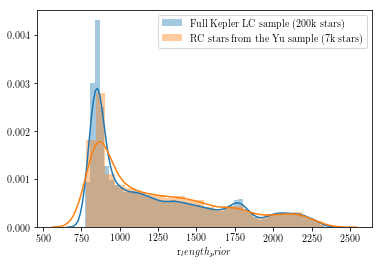

In [16]:
sns.distplot(df.r_length_prior,label='Full Kepler LC sample (200k stars)')
sns.distplot(yu18.r_length_prior,label='RC stars from the Yu sample (7k stars)')
plt.legend()
plt.show()

In [21]:
tdf = pd.read_csv('../data/TRILEGAL_sim/k1.6b_K15b30_0910_new.all.out.txt',sep='\s+')
tdf['Ak'] = omnitool.literature_values.Av_coeffs['Ks'].values[0]*tdf.Av
tdf['MK'] = tdf.Ks - tdf['m-M0'] - tdf.Ak
df['dist'] = 10.0**(tdf['m-M0'] / 5.0 + 1.0)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301021 entries, 0 to 301020
Data columns (total 24 columns):
#Gc           301021 non-null int64
logAge        301021 non-null float64
[M/H]         301021 non-null float64
m_ini         301021 non-null float64
logL          301021 non-null float64
logTe         301021 non-null float64
logg          301021 non-null float64
m-M0          301021 non-null float64
Av            301021 non-null float64
comp          301021 non-null int64
mbol          301021 non-null float64
Kepler        301021 non-null float64
g             301021 non-null float64
r             301021 non-null float64
i             301021 non-null float64
z             301021 non-null float64
DDO51_finf    301021 non-null float64
J             301021 non-null float64
H             301021 non-null float64
Ks            301021 non-null float64
Mact          301021 non-null float64
stage         301021 non-null int64
Ak            301021 non-null float64
MK            301021 

In [22]:
print(tdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301021 entries, 0 to 301020
Data columns (total 24 columns):
#Gc           301021 non-null int64
logAge        301021 non-null float64
[M/H]         301021 non-null float64
m_ini         301021 non-null float64
logL          301021 non-null float64
logTe         301021 non-null float64
logg          301021 non-null float64
m-M0          301021 non-null float64
Av            301021 non-null float64
comp          301021 non-null int64
mbol          301021 non-null float64
Kepler        301021 non-null float64
g             301021 non-null float64
r             301021 non-null float64
i             301021 non-null float64
z             301021 non-null float64
DDO51_finf    301021 non-null float64
J             301021 non-null float64
H             301021 non-null float64
Ks            301021 non-null float64
Mact          301021 non-null float64
stage         301021 non-null int64
Ak            301021 non-null float64
MK            301021 

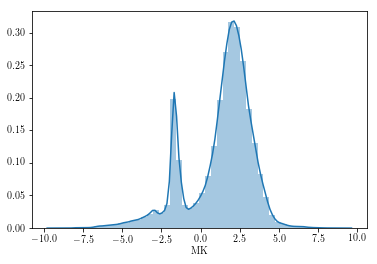

In [23]:
sns.distplot(tdf.MK)

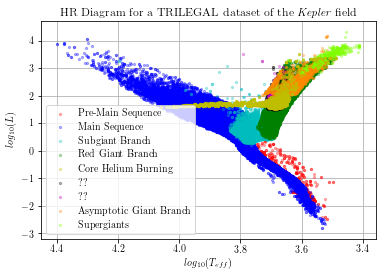

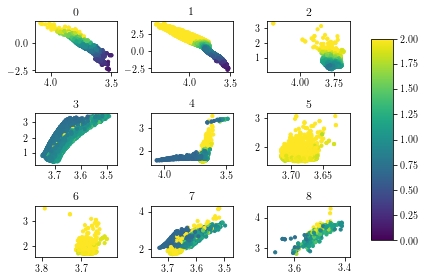

In [24]:
m_ks = tdf['Ks'].values
mu = tdf['m-M0'].values
Av = tdf['Av'].values
M = tdf['Mact'].values
labels =tdf['stage'].values
Zish = tdf['[M/H]'].values
logT = tdf['logTe'].values
logL = tdf['logL'].values

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots(3,3)
c = ['r','b','c','g','y','k','m','darkorange','chartreuse']
label = ['Pre-Main Sequence', 'Main Sequence', 'Subgiant Branch', 'Red Giant Branch', 'Core Helium Burning',\
            '??', '??', 'Asymptotic Giant Branch','Supergiants']
loc = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
for i in range(int(np.nanmax(labels))+1):
    # if i != 5:
    #     if i != 6:
    #         if i!= 8:
    ax.scatter(logT[labels==i],logL[labels==i],s=5,c=c[i],alpha=.3,label=label[i])
    im = ax2[loc[i]].scatter(logT[labels==i],logL[labels==i],s=10,c=M[labels==i],\
                        cmap='viridis',vmin=0.0,vmax=2.)
    ax2[loc[i]].set_title(str(i))
    ax2[loc[i]].invert_xaxis()

ax.scatter(logT[labels==4],logL[labels==4],s=5,c=c[4],alpha=.5)
ax.legend(loc='best',fancybox=True)
ax.invert_xaxis()
ax.set_xlabel(r"$log_{10}(T_{eff})$")
ax.set_ylabel(r'$log_{10}(L)$')
ax.set_title(r"HR Diagram for a TRILEGAL dataset of the $\textit{Kepler}$ field")
ax.grid()
ax.set_axisbelow(True)
fig2.tight_layout()

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.85,0.15,0.05,0.7])
fig2.colorbar(im,cax=cbar_ax)

plt.show(fig)
plt.close('all')

In [67]:
print(len(giantmask))
print(len(tdf))
print(len(df))

301021
301021
195585


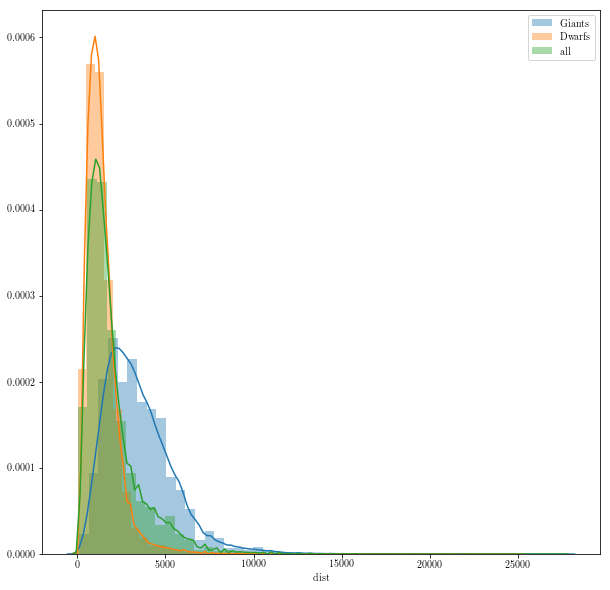

In [55]:
giantmask = tdf.stage >= 3.
dwarfmask = tdf.stage == 1.
fig = plt.figure(figsize=(10,10))
sns.distplot(df.dist[giantmask],label='Giants')
sns.distplot(df.dist[dwarfmask],label='Dwarfs')
sns.distplot(df.dist, label='all')
plt.legend()
plt.show()

In [27]:
'Lets draw up a quick stan model'
import pystan
lmodel = '''
functions {
    real bailerjones_lpdf(real r, real L){
        return log((1/(2*L^3)) * (r*r) * exp(-r/L));
    }
}
data {
    int<lower=0> N;
    real r[N];
}
parameters {
    real<lower=.1, upper=4000.> L;
}
model {
    for (n in 1:N){
        r[n] ~ bailerjones(L);
    }
}
'''

sm = pystan.StanModel(model_code=lmodel, model_name='lmodel')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL lmodel_fd8651f5e23d60506623f70ecc9faf8a NOW.


In [56]:
d = df.dist[giantmask].values
dat = {'N':len(d),
      'r' : d}
fit = sm.sampling(data=dat, iter=2000, chains=4)

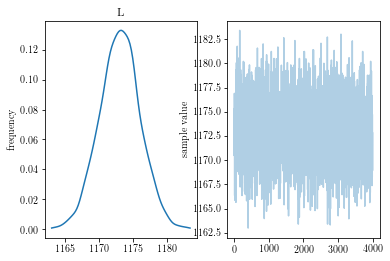

In [57]:
L_giant = np.median(fit['L'])
fit.plot()
plt.show()
print(fit)

In [31]:
d = df.dist[dwarfmask].values
dat = {'N':len(d),
      'r' : d}
fit = sm.sampling(data=dat, iter=2000, chains=4)

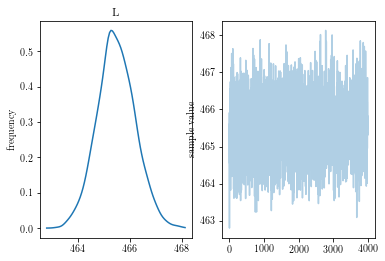

In [32]:
L_dwarf = np.median(fit['L'])
fit.plot()
plt.show()
print(fit)

In [33]:
d = df.dist.values
dat = {'N':len(d),
      'r' : d}
fit = sm.sampling(data=dat, iter=2000, chains=4)

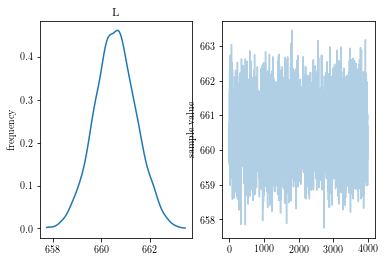

In [34]:
L_all = np.median(fit['L'])
fit.plot()
plt.show()
print(fit)

In [36]:
def bjl(r, L):
    return (1/(2*L**3)) * (r*r) * np.exp(-r/L);

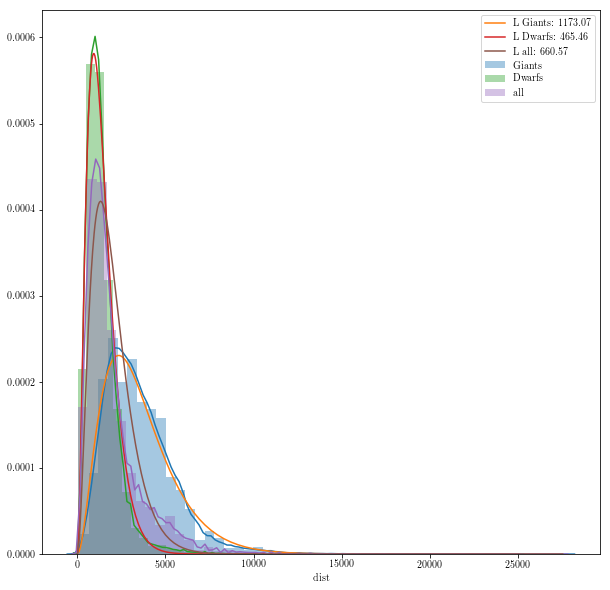

In [58]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df.dist[giantmask],label='Giants')
plt.plot(np.sort(df.dist[giantmask]), bjl(np.sort(df.dist[giantmask]),L_giant),label='L Giants: '+str(np.round(L_giant,2)))
sns.distplot(df.dist[dwarfmask],label='Dwarfs')
plt.plot(np.sort(df.dist[dwarfmask]), bjl(np.sort(df.dist[dwarfmask]),L_dwarf),label='L Dwarfs: '+str(np.round(L_dwarf,2)))
sns.distplot(df.dist, label='all')
plt.plot(np.sort(df.dist), bjl(np.sort(df.dist), L_all),label='L all: '+str(np.round(L_all,2)))
plt.legend()
plt.show()

In [61]:
print(fit)

Inference for Stan model: lmodel_fd8651f5e23d60506623f70ecc9faf8a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
L    1173.0    0.08   2.99 1167.2 1171.1 1173.0 1175.0 1178.9 1378.0    1.0
lp__ -4.4e5    0.02   0.69 -4.4e5 -4.4e5 -4.4e5 -4.4e5 -4.4e5 1774.0    1.0

Samples were drawn using NUTS at Mon 21 May 2018 12:13:36 .
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [62]:
'''Now lets do a quick check on how this affects the posteriors'''
def postprob_un(r, L, oo, oo_err):
    return r**2 * np.exp(-(r/L) - (1/(2*oo_err**2))*(oo - (1/r))**2)

In [63]:
r = linspace(0., 15000, 100000)
tdf['oo'] = 1/tdf.
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301021 entries, 0 to 301020
Data columns (total 24 columns):
#Gc           301021 non-null int64
logAge        301021 non-null float64
[M/H]         301021 non-null float64
m_ini         301021 non-null float64
logL          301021 non-null float64
logTe         301021 non-null float64
logg          301021 non-null float64
m-M0          301021 non-null float64
Av            301021 non-null float64
comp          301021 non-null int64
mbol          301021 non-null float64
Kepler        301021 non-null float64
g             301021 non-null float64
r             301021 non-null float64
i             301021 non-null float64
z             301021 non-null float64
DDO51_finf    301021 non-null float64
J             301021 non-null float64
H             301021 non-null float64
Ks            301021 non-null float64
Mact          301021 non-null float64
stage         301021 non-null int64
Ak            301021 non-null float64
MK            301021 